In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import json


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File path of the JSON file
file_path1 = 'drive/My Drive/Projects/LSE-Symptomatology/Data/PrimaryLabeled_Dataset(Post)'

In [ ]:
file_path2 = 'drive/My Drive/Projects/LSE-Symptomatology/Data/PrimaryLabeled_Dataset(Comment)'

In [ ]:
with open(file_path1, 'r', encoding='utf-8') as file:
    json_data = [json.loads(line) for line in file]

# Convert the JSON data into a DataFrame
df_submission = pd.DataFrame(json_data)

In [ ]:
df_submission

,postID,authorID,date,flairName,title,post,num_comments,score,upvote,downvote
0,cx393,[deleted],2010-08-04 02:25:45,None,Question about weight loss and PCOS.,"I'm 26, and can't afford health insurance for ...",6,8,NaN,NaN
1,cxl3p,improbablywrong,2010-08-05 05:16:03,None,Progesterone cream - do you use it?,I think this is a great treatment for PCOS. Id...,1,5,NaN,NaN
2,dd89k,hgielrehtaeh,2010-09-13 15:16:16,None,"Really, really, REALLY struggling with my inab...",I've had 7 cousins have babies in the last two...,8,7,NaN,NaN
3,ds0n2,cisforcourtney,2010-10-16 11:19:46,None,Question About Clothing,I recently gained some weight and it seems lik...,9,7,NaN,NaN
4,dylgr,GuiltEngine,2010-10-30 05:40:06,None,PCOS and hair loss,"Hallo there, very specialized subreddit that I...",0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59957,1006iv8,HeniHenri14,2022-12-31 23:28:56,Success story,"New year, another period",I cannot believe that the first thing that hap...,2,12,NaN,NaN
59958,1006j45,blocked_memory,2022-12-31 23:29:18,General/Advice,I just need advice on the disease! I don’t wan...,I’m just so fed up. I had a suspicion I had PC...,2,0,NaN,NaN
59959,1006k7h,Comfortable-Cat-4323,2022-12-31 23:30:45,General Health,Is this what insulin resistance feels like?,"I have not been diagnosed with PCOS, but I hav...",2,2,NaN,NaN
59960,1006s76,Existing-Cherry4948,2022-12-31 23:42:26,General/Advice,First Gyno Consult. Advice,My appointment with the gyno is long overdue l...,5,4,NaN,NaN


In [ ]:
# Load the JSON data from the file
data_comments = []

with open(file_path2, 'r') as file:
    for line in file:
        data_comments.append(json.loads(line))

In [ ]:
df_comments = pd.DataFrame(data_comments)

In [ ]:
df_comments

,commentID,authorID,date,comment,parentID,linkID
0,c0uubmc,improbablywrong,2010-07-21 22:15:28,"I've tried several items on this list, like Me...",t3_cs80y,t3_cs80y
1,c0ux9q2,emmster,2010-07-22 20:41:36,"I eat a generally lower carb diet (That's ""die...",t3_cs80y,t3_cs80y
2,c0uxcw1,vixiera,2010-07-22 21:13:36,"I self-diagnosed myself a few years ago, but I...",t3_cs80y,t3_cs80y
3,c0uxxpr,improbablywrong,2010-07-23 00:55:28,"I haven't visited their forum for a while, but...",t3_csm11,t3_csm11
4,c0uy2d1,Amberkins72187,2010-07-23 01:48:48,I have had that site bookmarked forever. I hav...,t3_csm11,t3_csm11
...,...,...,...,...,...,...
641436,j2ftbmd,BumAndBummer,2022-12-31 23:27:39,There are people out there who won’t find you ...,t3_100626v,t3_100626v
641437,j2ftpr4,loandlye,2022-12-31 23:30:34,"for me personally, i was a candy junky. i star...",t1_j2fq3t8,t3_zzxl05
641438,j2fu1eb,blocked_memory,2022-12-31 23:32:59,"I know it’s not an ideal solution, but the cop...",t3_zzthyv,t3_zzthyv
641439,j2fwdiq,ChiSky18,2022-12-31 23:50:23,It is very effective at treating insulin resis...,t1_j2c6dfn,t3_zzhmum


In [ ]:

df_submission['date'] = pd.to_datetime(df_submission['date'], errors='coerce')  # datetime
df_submission['month_year'] = df_submission['date'].dt.to_period('M')  # month and year

In [ ]:

#  Group by Month and Year
monthly_user_counts = df_submission.groupby('month_year')['authorID'].nunique().reset_index()
monthly_user_counts.rename(columns={'authorID': 'Total Unique Users'}, inplace=True)

In [ ]:
# Define the symptom dictionary
symptoms = {
    'brain fog': ['brain fog', 'foggy head'],
    'hypothyroidism': ['hypothyroidism', 'thyroid issues', 'hypothyroid', 'thyroid'],
    'low libido': ['low libido', 'low sex drive', 'decreased libido'],
    'night sweats': ['night sweats', 'sweating', 'hot flashes'],
    'cravings': ['cravings', 'sugar cravings'],
     #'pain during sex': ['pain during sex','painful sex', 'pain during intercourse'],
}


In [ ]:
# search for symptom mentions
def search_symptoms(text, symptom_variations):
    for variation in symptom_variations:
        if re.search(r'\b' + re.escape(variation.rstrip('s')) + r's?\b', text, re.IGNORECASE):
            return True
    return False

In [ ]:

# Count Unique Users Mentioning Each Symptom per Month
monthly_symptom_user_counts = {symptom: [] for symptom in symptoms}

for period, group in df_submission.groupby('month_year'):
    total_users = group['authorID'].nunique()
    for symptom, variations in symptoms.items():

        symptom_users = set()
        for _, row in group.iterrows():
            combined_text = (row.get('title', '') + " " + row.get('post', '')).strip()
            if search_symptoms(combined_text, variations):
                symptom_users.add(row['authorID'])

        monthly_symptom_user_counts[symptom].append((period, len(symptom_users), total_users))

In [ ]:


symptom_monthly_df = pd.DataFrame()
for symptom, counts in monthly_symptom_user_counts.items():
    temp_df = pd.DataFrame(counts, columns=['Month-Year', 'Unique Symptom Users', 'Total Unique Users'])
    temp_df['Symptom'] = symptom

    symptom_monthly_df = pd.concat([symptom_monthly_df, temp_df], ignore_index=True)

# Sort and reset index for visualize
symptom_monthly_df.sort_values(by=['Month-Year', 'Symptom'], inplace=True)
symptom_monthly_df.reset_index(drop=True, inplace=True)




In [ ]:
symptom_monthly_df

,Month-Year,Unique Symptom Users,Total Unique Users,Symptom
0,2010-08,0,2,anemia
1,2010-08,0,2,brain fog
2,2010-08,0,2,hypothyroidism
3,2010-08,0,2,low libido
4,2010-08,0,2,night sweats
...,...,...,...,...
871,2022-12,16,1088,brain fog
872,2022-12,43,1088,hypothyroidism
873,2022-12,4,1088,low libido
874,2022-12,9,1088,night sweats


In [ ]:
# Save the dataframe to a CSV file for local inspection
symptom_monthly_df.to_csv('monthly_symptom_analysis.csv', index=False)

# Or display the first few rows
print(symptom_monthly_df.head())


  Month-Year  Unique Symptom Users  Total Unique Users         Symptom
0    2010-08                     0                   2          anemia
1    2010-08                     0                   2       brain fog
2    2010-08                     0                   2  hypothyroidism
3    2010-08                     0                   2      low libido
4    2010-08                     0                   2    night sweats


In [ ]:
# Step 1: Extract Year from the 'date' column
df_submission['year'] = df_submission['date'].dt.year  # Extract the year

# Step 2: Group by Year
yearly_user_counts = df_submission.groupby('year')['authorID'].nunique().reset_index()
yearly_user_counts.rename(columns={'authorID': 'Total Unique Users'}, inplace=True)

# Step 3: Count Unique Users Mentioning Each Symptom per Year
yearly_symptom_user_counts = {symptom: [] for symptom in symptoms}

for year, group in df_submission.groupby('year'):
    total_users = group['authorID'].nunique()
    for symptom, variations in symptoms.items():
        # Find unique users mentioning the symptom
        symptom_users = set()
        for _, row in group.iterrows():
            combined_text = (row.get('title', '') + " " + row.get('post', '')).strip()
            if search_symptoms(combined_text, variations):
                symptom_users.add(row['authorID'])
        # Store the count
        yearly_symptom_user_counts[symptom].append((year, len(symptom_users), total_users))

# Step 4: Combine Data and Calculate Percentages
symptom_yearly_df = pd.DataFrame()
for symptom, counts in yearly_symptom_user_counts.items():
    temp_df = pd.DataFrame(counts, columns=['Year', 'Unique Symptom Users', 'Total Unique Users'])
    temp_df['Symptom'] = symptom
    temp_df['Percentage'] = (temp_df['Unique Symptom Users'] / temp_df['Total Unique Users']) * 100
    symptom_yearly_df = pd.concat([symptom_yearly_df, temp_df], ignore_index=True)

# Sort and reset index for clean visualization
symptom_yearly_df.sort_values(by=['Year', 'Symptom'], inplace=True)
symptom_yearly_df.reset_index(drop=True, inplace=True)

# Display the result for analysis



In [ ]:
symptom_yearly_df

,Year,Unique Symptom Users,Total Unique Users,Symptom,Percentage
0,2010,0,6,brain fog,0.000000
1,2010,0,6,cravings,0.000000
2,2010,0,6,hypothyroidism,0.000000
3,2010,0,6,low libido,0.000000
4,2010,0,6,night sweats,0.000000
...,...,...,...,...,...
60,2022,139,9748,brain fog,1.425934
61,2022,404,9748,cravings,4.144440
62,2022,510,9748,hypothyroidism,5.231842
63,2022,65,9748,low libido,0.666803


In [ ]:
from collections import defaultdict
# Function to search for symptom mentions
def search_symptoms(text, symptom_variations):
    for variation in symptom_variations:
        if re.search(r'\b' + re.escape(variation.rstrip('s')) + r's?\b', text, re.IGNORECASE):
            return True
    return False

# Add 'year' column to both datasets
df_submission['date'] = pd.to_datetime(df_submission['date'], errors='coerce')
df_submission['year'] = df_submission['date'].dt.year
df_comments['date'] = pd.to_datetime(df_comments['date'], errors='coerce')
df_comments['year'] = df_comments['date'].dt.year

# Initialize a dictionary to store unique users per year and symptom
yearly_symptom_user_counts = defaultdict(lambda: defaultdict(set))

# Process post dataset
for _, row in df_submission.iterrows():
    combined_text = (row.get('title', '') + " " + row.get('post', '')).strip()
    for symptom, variations in symptoms.items():
        if search_symptoms(combined_text, variations):
            yearly_symptom_user_counts[row['year']][symptom].add(row['authorID'])

# Process comment dataset
for _, row in df_comments.iterrows():
    for symptom, variations in symptoms.items():
        if search_symptoms(row['comment'], variations):
            yearly_symptom_user_counts[row['year']][symptom].add(row['authorID'])

# Summarize the data into a DataFrame
summary_data = []
for year, symptom_data in yearly_symptom_user_counts.items():
    for symptom, users in symptom_data.items():
        summary_data.append({'Year': year, 'Symptom': symptom, 'Unique User Count': len(users)})

yearly_symptom_df = pd.DataFrame(summary_data)

# Sort the data for visualization
yearly_symptom_df.sort_values(by=['Year', 'Symptom'], inplace=True)

# Display the results for verification
print(yearly_symptom_df)

    Year         Symptom  Unique User Count
1   2011        cravings                  2
0   2011  hypothyroidism                 11
2   2011    night sweats                  1
5   2012        cravings                 31
3   2012  hypothyroidism                 49
6   2012      low libido                  1
4   2012    night sweats                 16
11  2013       brain fog                  2
7   2013        cravings                 43
8   2013  hypothyroidism                122
9   2013      low libido                  6
10  2013    night sweats                 24
16  2014       brain fog                  6
14  2014        cravings                 96
13  2014  hypothyroidism                141
15  2014      low libido                  7
12  2014    night sweats                 31
18  2015       brain fog                 12
20  2015        cravings                142
17  2015  hypothyroidism                219
21  2015      low libido                 14
19  2015    night sweats        

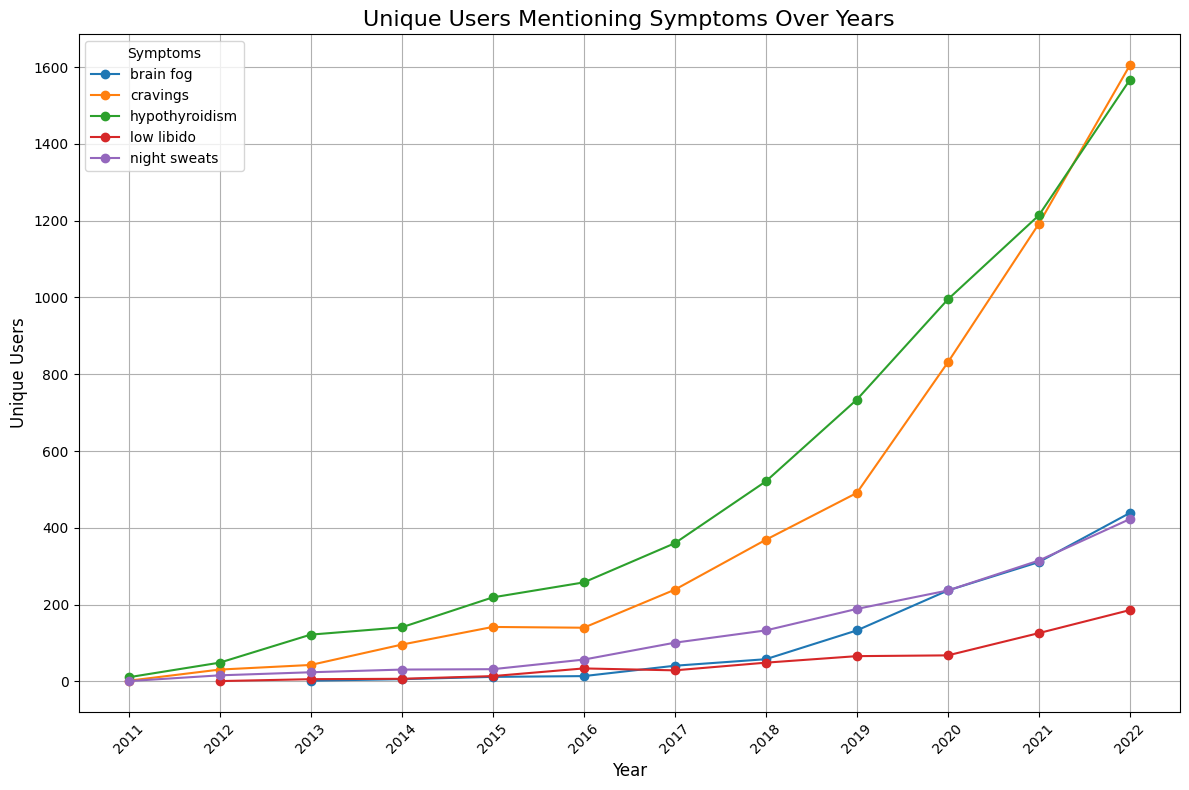

In [ ]:
# Optional: Visualization
import matplotlib.pyplot as plt

# Pivot the data for plotting
pivot_data = yearly_symptom_df.pivot(index='Year', columns='Symptom', values='Unique User Count')

# Plot the data
plt.figure(figsize=(12, 8))
for symptom in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[symptom], marker='o', label=symptom)

# Customize the plot
plt.title("Unique Users Mentioning Symptoms Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unique Users", fontsize=12)
plt.legend(title="Symptoms", loc='upper left', fontsize=10)
plt.grid(True)
plt.xticks(pivot_data.index, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Save the DataFrame to an Excel file for future use
yearly_symptom_df.to_excel("yearly_symptom_trends.xlsx", index=False)